# Load Libraries

In [507]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,  roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error, f1_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve, plot_cumulative_gain
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import specificity_score, sensitivity_score
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate
from scikitplot.metrics import plot_lift_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree

# Load Data

## Un-matched dataset

In [392]:
#Load dataset
pcs = pd.read_csv(r'C:\Users\Halee\Downloads\final_data.csv')
pcs.head()

,participant_type,age,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,global_qol_scale,...,psqi_glob,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi
0,Vet,44,Man,White,Non,3,0,0,Cov,40,...,16.0,Healthy,10,Mod,0,4,1.0,0.0,Before,0
1,Vet,57,Man,Asian,Non,1,0,0,Emp,90,...,6.0,Healthy,3,None,0,2,2.0,3.0,Before,1
2,Vet,56,Woman,White,Non,2,0,0,Emp,85,...,7.0,Healthy,10,Mild,2,2,1.0,0.0,Before,1
3,Vet,50,Man,More,Non,1,1,0,Emp,55,...,16.0,Healthy,87,Mild,1,3,3.0,0.0,Before,0
4,Vet,51,Man,White,Non,1,0,0,Emp,55,...,10.0,PASC,24,None,0,4,2.0,2.0,After,1


In [393]:
pcs.shape

(793, 34)

## Matched dataset

In [394]:
# Load matched dataset
pcs_m = pd.read_csv(r'C:\Users\Halee\Downloads\match_data.csv')
pcs_m.head()

,participant_type,age,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,global_qol_scale,...,psqi_glob,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi
0,Vet,44,Man,White,Non,3,0,0,Cov,40,...,16,Healthy,10,Mod,0,4,1.0,0.0,Before,0
1,Vet,56,Woman,White,Non,2,0,0,Emp,85,...,7,Healthy,10,Mild,2,2,1.0,0.0,Before,1
2,Vet,50,Man,More,Non,1,1,0,Emp,55,...,16,Healthy,87,Mild,1,3,3.0,0.0,Before,0
3,Vet,51,Man,White,Non,1,0,0,Emp,55,...,10,PASC,24,None,0,4,2.0,2.0,After,1
4,Vet,50,Man,White,Non,1,0,0,Emp,85,...,4,Healthy,3,Mild,0,2,2.0,3.0,Before,0


## Cognitive Data Only

In [395]:
pcs_c = pd.read_csv(r'C:\Users\Halee\Downloads\cog_data.csv')
pcs_c.head()

,promis_cog_score,pcs_diag,vs_a_rt_mn_s,vs_a_rt_sd_s,vs_a_acc_s,vs_p_rt_mn_s,vs_p_rt_sd_s,vs_p_acc_s,vs_a_rt_mn_l,vs_a_rt_sd_l,...,rat_e_rt_mn,rat_e_rt_sd,rat_e_acc,rat_m_rt_mn,rat_m_rt_sd,rat_m_acc,rat_h_rt_mn,rat_h_rt_sd,rat_h_acc,cluster
0,31,Healthy,1343.433333,1938.307066,0.166667,2595.966667,5426.511870,1.000000,268.333333,333.458758,...,968.766667,70.609796,0.000000,1482.566667,852.450118,0.000000,8905.660000,5712.871910,0.000000,2
1,40,Healthy,774.000000,36.122015,0.833333,704.333333,122.302358,0.833333,941.666667,132.730303,...,7459.000000,1765.988222,0.500000,30067.333333,32986.183366,0.500000,112371.000000,152353.481738,0.333333,4
2,40,Healthy,1115.150000,635.356850,0.833333,980.250000,247.741476,0.833333,1705.200000,286.358447,...,7787.100000,1302.346824,0.333333,6276.800000,2096.274531,0.666667,6677.633333,1230.960244,0.333333,4
3,30,Healthy,524.533333,350.486066,0.666667,727.766667,255.594684,0.833333,3542.133333,5298.095183,...,9787.833333,1773.319809,0.333333,7278.766667,3329.771572,0.333333,9334.533333,6190.750328,0.000000,4
4,36,PASC,2096.850000,2542.754454,0.333333,1037.700000,193.934742,0.500000,1268.000000,334.855431,...,10565.700000,1922.569810,0.600000,38298.760000,28650.504954,0.400000,33344.500000,33970.473297,0.333333,5


# Verify dataframe info

In [396]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   gender                 793 non-null    object 
 3   race                   793 non-null    object 
 4   ethnicity              793 non-null    object 
 5   racial_stress          793 non-null    int64  
 6   nicotine_status        793 non-null    int64  
 7   rehab_status           793 non-null    int64  
 8   unemployment_covid     793 non-null    object 
 9   global_qol_scale       793 non-null    int64  
 10  vaccine_menstrual      793 non-null    object 
 11  med_access             793 non-null    int64  
 12  initial_symptom_score  793 non-null    int64  
 13  pre_pandemic           793 non-null    int64  
 14  promis_cog_score       793 non-null    int64  
 15  hit6_s

In [397]:
pcs_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       298 non-null    object 
 1   age                    298 non-null    int64  
 2   gender                 298 non-null    object 
 3   race                   298 non-null    object 
 4   ethnicity              298 non-null    object 
 5   racial_stress          298 non-null    int64  
 6   nicotine_status        298 non-null    int64  
 7   rehab_status           298 non-null    int64  
 8   unemployment_covid     298 non-null    object 
 9   global_qol_scale       298 non-null    int64  
 10  vaccine_menstrual      298 non-null    object 
 11  med_access             298 non-null    int64  
 12  initial_symptom_score  298 non-null    int64  
 13  pre_pandemic           298 non-null    int64  
 14  promis_cog_score       298 non-null    int64  
 15  hit6_s

In [398]:
pcs_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   promis_cog_score  793 non-null    int64  
 1   pcs_diag          789 non-null    object 
 2   vs_a_rt_mn_s      793 non-null    float64
 3   vs_a_rt_sd_s      793 non-null    float64
 4   vs_a_acc_s        793 non-null    float64
 5   vs_p_rt_mn_s      793 non-null    float64
 6   vs_p_rt_sd_s      793 non-null    float64
 7   vs_p_acc_s        793 non-null    float64
 8   vs_a_rt_mn_l      793 non-null    float64
 9   vs_a_rt_sd_l      793 non-null    float64
 10  vs_a_acc_l        793 non-null    float64
 11  vs_p_rt_mn_l      793 non-null    float64
 12  vs_p_rt_sd_l      793 non-null    float64
 13  vs_p_acc_l        793 non-null    float64
 14  f_c_rt_mn         792 non-null    float64
 15  f_c_rt_sd         792 non-null    float64
 16  f_c_acc           792 non-null    float64
 1

# Verify Outcome Variable Proportions

In [399]:
pcs['pcs_diag'].value_counts()

Healthy    511
PASC       278
Name: pcs_diag, dtype: int64

# Udpate data types

In [400]:
pcs['gender'] = pcs['gender'].astype('category')
pcs['race'] = pcs['race'].astype('category')
pcs['ethnicity'] = pcs['ethnicity'].astype('category')
pcs['unemployment_covid'] = pcs['unemployment_covid'].astype('category')
pcs['pcs_diag'] = pcs['pcs_diag'].astype('category')
pcs['tbi_prob'] = pcs['tbi_prob'].astype('category')
pcs['vacc_bi'] = pcs['vacc_bi'].astype('category')
pcs['nicotine_status'] = pcs['nicotine_status'].astype('category')
pcs['rehab_status'] = pcs['rehab_status'].astype('category')
pcs['cardio_bi'] = pcs['cardio_bi'].astype('category')
pcs['cpt_profile'] = pcs['cpt_profile'].astype('category')
pcs['sus_att'] = pcs['sus_att'].astype('category')
pcs['participant_type'] = pcs['participant_type'].astype('category')
pcs['vaccine_menstrual'] = pcs['vaccine_menstrual'].astype('category')
pcs['med_access'] = pcs['med_access'].astype('category')


In [401]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   participant_type       793 non-null    category
 1   age                    793 non-null    int64   
 2   gender                 793 non-null    category
 3   race                   793 non-null    category
 4   ethnicity              793 non-null    category
 5   racial_stress          793 non-null    int64   
 6   nicotine_status        793 non-null    category
 7   rehab_status           793 non-null    category
 8   unemployment_covid     793 non-null    category
 9   global_qol_scale       793 non-null    int64   
 10  vaccine_menstrual      793 non-null    category
 11  med_access             793 non-null    category
 12  initial_symptom_score  793 non-null    int64   
 13  pre_pandemic           793 non-null    int64   
 14  promis_cog_score       793 non-null    int

# Define numerical and categorical variables

In [402]:
cats = ['cpt_profile', 'participant_type',
        'gender', 'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 
        'unemployment_covid', 'vaccine_menstrual',
        'tbi_prob', 'vacc_bi', 'cardio_bi',
        'med_access', 'sus_att']
nums = ['age',
        'global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_cog_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        'racial_stress', 
        'fin_stress'] 
all_vars = cats+nums

# Create Transformation Pipeline

In [403]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats), 
                                            ('num', num_pipe, nums)],
                                          verbose_feature_names_out=False))
# Verify steps
all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'tbi_prob', 'vacc_bi',
                                   'cardio_bi', 'med_access', 'sus_att']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['age', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
                                   'promis_cog_score', 'hit6_score',
              

# Split Data into Training and Test Sets for Predictive Model

In [404]:
# Split the data into features (X) and the binary target variable (y).
X = pcs[all_vars]

#Make outcome variable into binary variable
pcs['pcs_diag'] = pcs['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y = pcs[['pcs_diag']]


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

In [405]:
#Confirm stratified split
y_train.value_counts()/len(y_train)

pcs_diag
0           0.654054
1           0.340541
dtype: float64

In [406]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 341 to 37
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pcs_diag  552 non-null    category
dtypes: category(1)
memory usage: 5.0 KB


In [407]:
X_train.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress
341,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,None,...,25,71,26,27,32.8,12,16.0,1,2,4
172,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,None,...,29,64,0,6,21.0,19,12.0,3,1,6
399,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,None,...,3,55,0,0,27.6,20,4.0,0,1,2
481,NaN,Civ,NonBi,White,Non,0,0,Emp,No/NA,None,...,21,60,2,1,44.3,7,8.0,0,2,4
103,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,7,72,0,2,30.8,4,14.0,0,2,4


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'global_qol_scale'}>,
        <AxesSubplot:title={'center':'initial_symptom_score'}>,
        <AxesSubplot:title={'center':'pre_pandemic'}>],
       [<AxesSubplot:title={'center':'promis_cog_score'}>,
        <AxesSubplot:title={'center':'hit6_score'}>,
        <AxesSubplot:title={'center':'fatigue_score'}>,
        <AxesSubplot:title={'center':'gad7_tot_score'}>],
       [<AxesSubplot:title={'center':'phq9_total'}>,
        <AxesSubplot:title={'center':'pss_overall_score'}>,
        <AxesSubplot:title={'center':'social_support_score'}>,
        <AxesSubplot:title={'center':'dvprs_score'}>],
       [<AxesSubplot:title={'center':'dyspnoea_12_score'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'psqi_glob'}>],
       [<AxesSubplot:title={'center':'mental'}>,
        <AxesSubplot:title={'center':'racial_stress'}>,
   

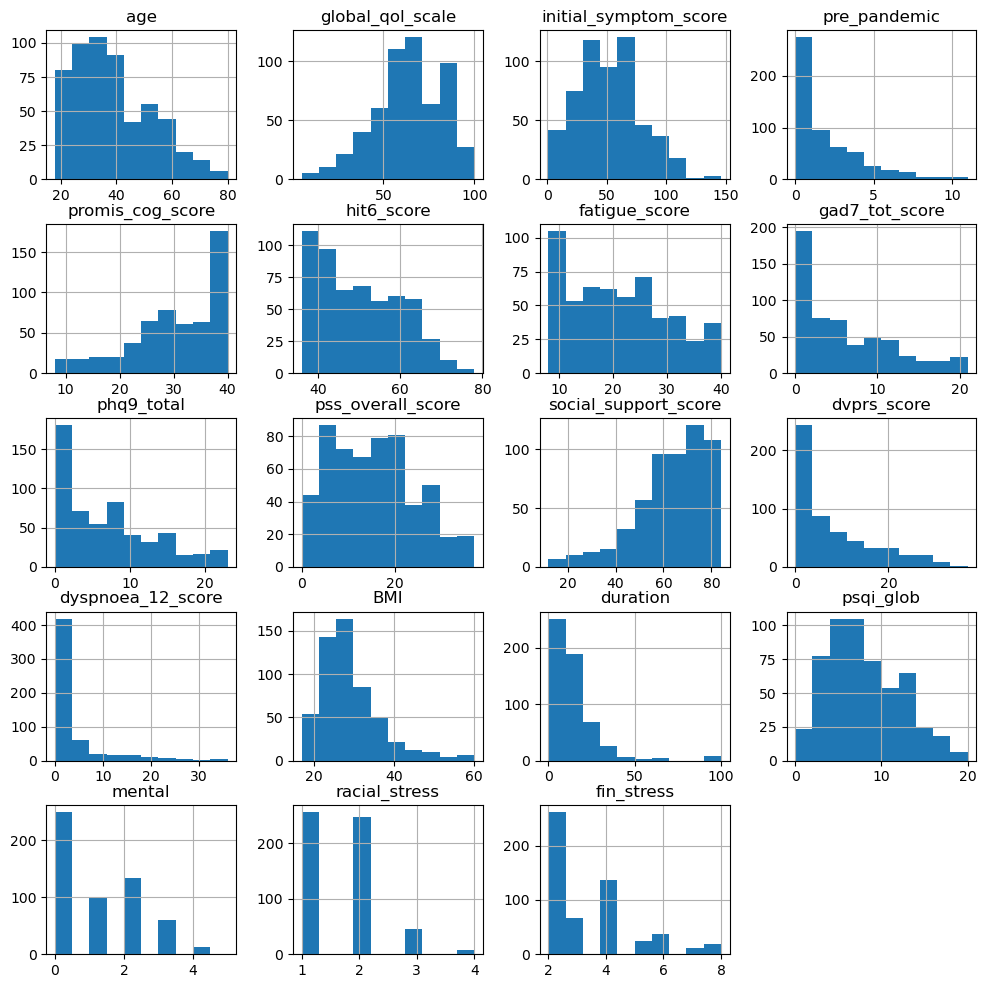

In [408]:
X_train.hist(figsize = (12,12))

In [409]:
X_train.describe()

,age,global_qol_scale,initial_symptom_score,pre_pandemic,promis_cog_score,hit6_score,fatigue_score,gad7_tot_score,phq9_total,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,548.000000,555.000000,552.000000,555.000000,555.000000,555.000000
mean,38.801802,64.306306,51.918919,2.120721,30.416216,50.163964,20.945946,6.028829,6.852252,15.490090,63.592793,7.807207,3.140541,28.833394,13.927928,7.452899,1.088288,1.645045,3.311712
std,13.556021,19.360625,26.406273,2.162576,8.433736,9.858391,9.125121,5.644002,6.205838,8.913007,15.124392,8.760797,6.164273,7.503454,14.030982,4.166406,1.167145,0.683844,1.602724
min,18.000000,5.000000,1.000000,0.000000,8.000000,36.000000,8.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,28.000000,55.000000,32.000000,0.000000,25.000000,42.000000,13.000000,1.000000,1.000000,8.000000,56.000000,0.000000,0.000000,23.700000,7.000000,4.000000,0.000000,1.000000,2.000000
50%,36.000000,70.000000,51.000000,2.000000,32.000000,49.000000,20.000000,5.000000,5.000000,15.000000,66.000000,5.000000,0.000000,27.400000,10.000000,7.000000,1.000000,2.000000,3.000000
75%,48.500000,80.000000,68.000000,3.000000,38.000000,58.000000,28.000000,10.000000,11.000000,22.000000,74.000000,13.000000,3.000000,32.200000,16.000000,10.000000,2.000000,2.000000,4.000000
max,80.000000,100.000000,146.000000,11.000000,40.000000,78.000000,40.000000,21.000000,23.000000,37.000000,84.000000,37.000000,36.000000,60.000000,100.000000,20.000000,5.000000,4.000000,8.000000


# Impute missing values

In [410]:
X_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_train), 
                           columns = X_train.columns.to_list())
X_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_test),
                         columns = X_test.columns.to_list())

In [411]:
X_train_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress
0,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,None,...,25,71,26,27,32.8,12,16.0,1,2,4
1,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,None,...,29,64,0,6,21.0,19,12.0,3,1,6
2,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,None,...,3,55,0,0,27.6,20,4.0,0,1,2
3,0.0,Civ,NonBi,White,Non,0,0,Emp,No/NA,None,...,21,60,2,1,44.3,7,8.0,0,2,4
4,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,7,72,0,2,30.8,4,14.0,0,2,4


In [412]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            555 non-null    object
 1   participant_type       555 non-null    object
 2   gender                 555 non-null    object
 3   race                   555 non-null    object
 4   ethnicity              555 non-null    object
 5   nicotine_status        555 non-null    object
 6   rehab_status           555 non-null    object
 7   unemployment_covid     555 non-null    object
 8   vaccine_menstrual      555 non-null    object
 9   tbi_prob               555 non-null    object
 10  vacc_bi                555 non-null    object
 11  cardio_bi              555 non-null    object
 12  med_access             555 non-null    object
 13  sus_att                555 non-null    object
 14  age                    555 non-null    object
 15  global_qol_scale       

In [413]:
#update data types
X_train_imp['gender'] = X_train_imp['gender'].astype('category')
X_train_imp['race'] = X_train_imp['race'].astype('category')
X_train_imp['ethnicity'] = X_train_imp['ethnicity'].astype('category')
X_train_imp['unemployment_covid'] = X_train_imp['unemployment_covid'].astype('category')
X_train_imp['tbi_prob'] = X_train_imp['tbi_prob'].astype('category')
X_train_imp['vacc_bi'] = X_train_imp['vacc_bi'].astype('category')
X_train_imp['nicotine_status'] = X_train_imp['nicotine_status'].astype('category')
X_train_imp['rehab_status'] = X_train_imp['rehab_status'].astype('category')
X_train_imp['cardio_bi'] = X_train_imp['cardio_bi'].astype('category')
X_train_imp['cpt_profile'] = X_train_imp['cpt_profile'].astype('category')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('category')
X_train_imp['participant_type'] = X_train_imp['participant_type'].astype('category')
X_train_imp['vaccine_menstrual'] = X_train_imp['vaccine_menstrual'].astype('category')
X_train_imp['med_access'] = X_train_imp['med_access'].astype('category')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('category')

X_train_imp['age'] = X_train_imp['age'].astype('int64')
X_train_imp['global_qol_scale'] = X_train_imp['global_qol_scale'].astype('int64')
X_train_imp['initial_symptom_score'] = X_train_imp['initial_symptom_score'].astype('int64')
X_train_imp['pre_pandemic'] = X_train_imp['pre_pandemic'].astype('int64')
X_train_imp['promis_cog_score'] = X_train_imp['promis_cog_score'].astype('int64')
X_train_imp['hit6_score'] = X_train_imp['hit6_score'].astype('int64')
X_train_imp['fatigue_score'] = X_train_imp['fatigue_score'].astype('int64')
X_train_imp['gad7_tot_score'] = X_train_imp['gad7_tot_score'].astype('int64')
X_train_imp['phq9_total'] = X_train_imp['phq9_total'].astype('int64')
X_train_imp['pss_overall_score'] = X_train_imp['pss_overall_score'].astype('int64')
X_train_imp['social_support_score'] = X_train_imp['social_support_score'].astype('int64')
X_train_imp['dvprs_score'] = X_train_imp['dvprs_score'].astype('int64')
X_train_imp['dyspnoea_12_score'] = X_train_imp['dyspnoea_12_score'].astype('int64')
X_train_imp['BMI'] = X_train_imp['BMI'].astype('int64')
X_train_imp['duration'] = X_train_imp['duration'].astype('int64')
X_train_imp['psqi_glob'] = X_train_imp['psqi_glob'].astype('int64')
X_train_imp['mental'] = X_train_imp['mental'].astype('int64')
X_train_imp['racial_stress'] = X_train_imp['racial_stress'].astype('int64')
X_train_imp['fin_stress'] = X_train_imp['fin_stress'].astype('int64')

In [414]:
X_test_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress
0,3.0,Vet,Woman,White,Non,0,0,Unemp,No/NA,None,...,19,58,21,0,30.0,5,11.0,3,1,3
1,0.0,Civ,Man,White,Non,1,0,Emp,No/NA,Mild,...,30,48,0,0,25.5,8,12.0,2,1,2
2,0.0,Civ,Woman,More,His/LatX,1,0,Emp,No/NA,None,...,26,75,9,0,24.8,10,7.0,1,2,2
3,0.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,13,71,5,0,33.9,2,4.0,3,1,2
4,0.0,Civ,Woman,White,Non,1,0,Unemp,No/NA,Mild,...,11,67,4,2,40.7,14,3.0,1,1,4


In [415]:
X_test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            238 non-null    object
 1   participant_type       238 non-null    object
 2   gender                 238 non-null    object
 3   race                   238 non-null    object
 4   ethnicity              238 non-null    object
 5   nicotine_status        238 non-null    object
 6   rehab_status           238 non-null    object
 7   unemployment_covid     238 non-null    object
 8   vaccine_menstrual      238 non-null    object
 9   tbi_prob               238 non-null    object
 10  vacc_bi                238 non-null    object
 11  cardio_bi              238 non-null    object
 12  med_access             238 non-null    object
 13  sus_att                238 non-null    object
 14  age                    238 non-null    object
 15  global_qol_scale       

In [416]:
#update data types
X_test_imp['gender'] = X_test_imp['gender'].astype('category')
X_test_imp['race'] = X_test_imp['race'].astype('category')
X_test_imp['ethnicity'] = X_test_imp['ethnicity'].astype('category')
X_test_imp['unemployment_covid'] = X_test_imp['unemployment_covid'].astype('category')
X_test_imp['tbi_prob'] = X_test_imp['tbi_prob'].astype('category')
X_test_imp['vacc_bi'] = X_test_imp['vacc_bi'].astype('category')
X_test_imp['nicotine_status'] = X_test_imp['nicotine_status'].astype('category')
X_test_imp['rehab_status'] = X_test_imp['rehab_status'].astype('category')
X_test_imp['cardio_bi'] = X_test_imp['cardio_bi'].astype('category')
X_test_imp['cpt_profile'] = X_test_imp['cpt_profile'].astype('category')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('category')
X_test_imp['participant_type'] = X_test_imp['participant_type'].astype('category')
X_test_imp['vaccine_menstrual'] = X_test_imp['vaccine_menstrual'].astype('category')
X_test_imp['med_access'] = X_test_imp['med_access'].astype('category')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('category')

X_test_imp['age'] = X_test_imp['age'].astype('int64')
X_test_imp['global_qol_scale'] = X_test_imp['global_qol_scale'].astype('int64')
X_test_imp['initial_symptom_score'] = X_test_imp['initial_symptom_score'].astype('int64')
X_test_imp['pre_pandemic'] = X_test_imp['pre_pandemic'].astype('int64')
X_test_imp['promis_cog_score'] = X_test_imp['promis_cog_score'].astype('int64')
X_test_imp['hit6_score'] = X_test_imp['hit6_score'].astype('int64')
X_test_imp['fatigue_score'] = X_test_imp['fatigue_score'].astype('int64')
X_test_imp['gad7_tot_score'] = X_test_imp['gad7_tot_score'].astype('int64')
X_test_imp['phq9_total'] = X_test_imp['phq9_total'].astype('int64')
X_test_imp['pss_overall_score'] = X_test_imp['pss_overall_score'].astype('int64')
X_test_imp['social_support_score'] = X_test_imp['social_support_score'].astype('int64')
X_test_imp['dvprs_score'] = X_test_imp['dvprs_score'].astype('int64')
X_test_imp['dyspnoea_12_score'] = X_test_imp['dyspnoea_12_score'].astype('int64')
X_test_imp['BMI'] = X_test_imp['BMI'].astype('int64')
X_test_imp['duration'] = X_test_imp['duration'].astype('int64')
X_test_imp['psqi_glob'] = X_test_imp['psqi_glob'].astype('int64')
X_test_imp['mental'] = X_test_imp['mental'].astype('int64')
X_test_imp['racial_stress'] = X_test_imp['racial_stress'].astype('int64')
X_test_imp['fin_stress'] = X_test_imp['fin_stress'].astype('int64')

# Transform Data with Pipeline

In [417]:
#Fit pipeline to resampled data
X_train_fit = all_pipe.fit(X_train_imp)
#Get feature names out from fit and create as new list
X_train_cols = X_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_train_pipe = pd.DataFrame(all_pipe.fit_transform(X_train_imp), columns = X_train_cols)

In [418]:
X_train_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           555 non-null    float64
 1   cpt_profile_1.0           555 non-null    float64
 2   cpt_profile_2.0           555 non-null    float64
 3   cpt_profile_3.0           555 non-null    float64
 4   participant_type_Vet      555 non-null    float64
 5   gender_Man                555 non-null    float64
 6   gender_NonBi              555 non-null    float64
 7   gender_Trans              555 non-null    float64
 8   gender_Woman              555 non-null    float64
 9   race_Asian                555 non-null    float64
 10  race_Black                555 non-null    float64
 11  race_HI/PI/AL/Oth         555 non-null    float64
 12  race_More                 555 non-null    float64
 13  race_White                555 non-null    float64
 14  ethnicity_

In [419]:
#Create new dataframe with transformed testing data, and apply feature name list as column names
#Fit pipeline to resampled data
X_test_fit = all_pipe.fit(X_test_imp)
#Get feature names out from fit and create as new list
X_test_cols = X_test_fit.get_feature_names_out().tolist()
X_test_pipe = pd.DataFrame(all_pipe.fit_transform(X_test_imp), columns = X_test_cols)

In [420]:
X_test_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           238 non-null    float64
 1   cpt_profile_1.0           238 non-null    float64
 2   cpt_profile_2.0           238 non-null    float64
 3   cpt_profile_3.0           238 non-null    float64
 4   participant_type_Vet      238 non-null    float64
 5   gender_Man                238 non-null    float64
 6   gender_NonBi              238 non-null    float64
 7   gender_Trans              238 non-null    float64
 8   gender_Woman              238 non-null    float64
 9   race_Asian                238 non-null    float64
 10  race_Black                238 non-null    float64
 11  race_HI/PI/AL/Oth         238 non-null    float64
 12  race_More                 238 non-null    float64
 13  race_White                238 non-null    float64
 14  ethnicity_

In [421]:
# Display the shapes of different datasets to check their dimensions
X_train_pipe.shape, X_test_pipe.shape

((555, 53), (238, 53))

# Impute Missing PASC Diagnosis

In [422]:
y_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_train), 
                           columns = y_train.columns.to_list())
y_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_test), 
                           columns = y_test.columns.to_list())

## Rebalance training set for 50/50 class proportion

In [423]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
rus = RandomUnderSampler(random_state = 1, sampling_strategy='majority')

# Perform random under-sampling on the training dataset
X_train_under, y_train_under = rus.fit_resample(X_train_pipe, y_train_imp)

In [424]:
# Check proportions 
y_train_under.value_counts()

pcs_diag
0.0         189
1.0         189
dtype: int64

## Remove C-1 dummies for logistic regression classifier

In [425]:
# Remove specific columns from the datasets
X_train_log = X_train_under.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None', 'sus_att_0.0'], axis = 1)
X_test_log = X_test_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None', 'sus_att_0.0'], axis = 1)

# Create Tranformed Dataset with All Data for Explanatory Model

In [426]:
# Split the data into features (X) and the binary target variable (y).
X_m = pcs_m[all_vars]

#Make outcome variable into binary variable
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y_m = pcs_m[['pcs_diag']]


X_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_m), 
                           columns = X_m.columns.to_list())

In [427]:
#update data types
X_imp['gender'] = X_imp['gender'].astype('category')
X_imp['race'] = X_imp['race'].astype('category')
X_imp['ethnicity'] = X_imp['ethnicity'].astype('category')
X_imp['unemployment_covid'] = X_imp['unemployment_covid'].astype('category')
X_imp['tbi_prob'] = X_imp['tbi_prob'].astype('category')
X_imp['vacc_bi'] = X_imp['vacc_bi'].astype('category')
X_imp['nicotine_status'] = X_imp['nicotine_status'].astype('category')
X_imp['rehab_status'] = X_imp['rehab_status'].astype('category')
X_imp['cardio_bi'] = X_imp['cardio_bi'].astype('category')
X_imp['cpt_profile'] = X_imp['cpt_profile'].astype('category')
X_imp['sus_att'] = X_imp['sus_att'].astype('category')
X_imp['participant_type'] = X_imp['participant_type'].astype('category')
X_imp['vaccine_menstrual'] = X_imp['vaccine_menstrual'].astype('category')
X_imp['med_access'] = X_imp['med_access'].astype('category')
X_imp['sus_att'] = X_imp['sus_att'].astype('category')

X_imp['age'] = X_imp['age'].astype('int64')
X_imp['global_qol_scale'] = X_imp['global_qol_scale'].astype('int64')
X_imp['initial_symptom_score'] = X_imp['initial_symptom_score'].astype('int64')
X_imp['pre_pandemic'] = X_imp['pre_pandemic'].astype('int64')
X_imp['promis_cog_score'] = X_imp['promis_cog_score'].astype('int64')
X_imp['hit6_score'] = X_imp['hit6_score'].astype('int64')
X_imp['fatigue_score'] = X_imp['fatigue_score'].astype('int64')
X_imp['gad7_tot_score'] = X_imp['gad7_tot_score'].astype('int64')
X_imp['phq9_total'] = X_imp['phq9_total'].astype('int64')
X_imp['pss_overall_score'] = X_imp['pss_overall_score'].astype('int64')
X_imp['social_support_score'] = X_imp['social_support_score'].astype('int64')
X_imp['dvprs_score'] = X_imp['dvprs_score'].astype('int64')
X_imp['dyspnoea_12_score'] = X_imp['dyspnoea_12_score'].astype('int64')
X_imp['BMI'] = X_imp['BMI'].astype('int64')
X_imp['duration'] = X_imp['duration'].astype('int64')
X_imp['psqi_glob'] = X_imp['psqi_glob'].astype('int64')
X_imp['mental'] = X_imp['mental'].astype('int64')
X_imp['racial_stress'] = X_imp['racial_stress'].astype('int64')
X_imp['fin_stress'] = X_imp['fin_stress'].astype('int64')

In [428]:
#Fit pipeline to resampled data
X_fit = all_pipe.fit(X_imp)
#Get feature names out from fit and create as new list
X_cols = X_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_pipe = pd.DataFrame(all_pipe.fit_transform(X_imp), columns = X_cols)

In [429]:
y_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_m), 
                           columns = y_m.columns.to_list())

In [430]:
X_log = X_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None', 'sus_att_0.0'], axis = 1)

# Predictive Model Training

## Logistic Regression with L2 Penalty

In [431]:
# Create Logistic Regression model with L2 regularization
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=5, random_state=1)

In [432]:
log_l2_bal.coef_

array([[ 0.01665257,  0.0633089 ,  0.01811244, -0.06919159,  0.00639952,
        -0.02926196,  0.26160701,  0.00965269,  0.08644616, -0.013314  ,
        -0.08234639, -0.04603162, -0.01945976,  0.00191506,  0.03825277,
        -0.1265757 ,  0.07503406,  0.04510766,  0.01777216,  0.06802468,
         0.12754781, -0.10360622, -0.07226646,  0.04476838,  0.12609881,
        -0.05995869, -0.07060524,  0.16072213, -0.02708649, -0.00273478,
        -0.07718592, -0.20479691,  0.1817578 ,  0.21302373,  0.24766685,
        -0.0457627 , -0.02463892, -0.05315066,  0.0435245 ,  0.18008483,
         0.21739957,  0.25273214,  0.23832763,  0.11969353,  0.17287866,
         0.19646114]])

In [433]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l2_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(df['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
6,gender_Woman,0.261607
41,duration,0.252732
34,gad7_tot_score,0.247667
42,psqi_glob,0.238328
40,BMI,0.217400
24,sus_att_1.0,0.126099
20,vacc_bi_After,0.127548
32,hit6_score,0.181758
44,racial_stress,0.172879
31,promis_cog_score,-0.204797


## Logistic Regression with L1 Penalty

In [434]:
# Create Logistic Regression model with L2 regularization
log_l1_bal = LogisticRegressionCV(solver = 'saga', penalty = 'l1', cv = 5, random_state = 1)
# Fit the model to the training data
log_l1_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=5, penalty='l1', random_state=1, solver='saga')

In [435]:
log_l1_bal.coef_[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.447253  ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.16925011,  0.        ,  0.        ,  0.        ,  0.        ,
        0.20581355, -0.01350655, -0.00400299,  0.        ,  0.20808626,
        0.        ,  0.        ,  0.15579932,  0.        ,  0.        ,
       -0.0772487 , -0.18633103,  0.20432806,  0.18069457,  0.29462154,
       -0.00565298, -0.00744716, -0.01750132,  0.        ,  0.17997232,
        0.24747552,  0.31802022,  0.28738152,  0.08389135,  0.20083541,
        0.22215186])

In [436]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l1_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(df['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
6,gender_Woman,0.447253
41,duration,0.318020
34,gad7_tot_score,0.294622
42,psqi_glob,0.287382
40,BMI,0.247476
33,fatigue_score,0.180695
31,promis_cog_score,-0.186331
32,hit6_score,0.204328
39,dyspnoea_12_score,0.179972
44,racial_stress,0.200835


## Random Forest Classifier

In [437]:
#Random Forest
# Create a Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
random_forest.fit(X_train_under, y_train_under.values.ravel())

RandomForestClassifier(random_state=1)

In [438]:
# Get feature importance scores
importances=random_forest.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
promis_cog_score: 0.0814
fatigue_score: 0.0742
gad7_tot_score: 0.0738
hit6_score: 0.0584
psqi_glob: 0.0560
pss_overall_score: 0.0516
initial_symptom_score: 0.0489
age: 0.0458
phq9_total: 0.0446
duration: 0.0438
BMI: 0.0427
social_support_score: 0.0405
dyspnoea_12_score: 0.0384
global_qol_scale: 0.0380
dvprs_score: 0.0312
fin_stress: 0.0259
pre_pandemic: 0.0230
racial_stress: 0.0175
mental: 0.0166
gender_Man: 0.0108
gender_Woman: 0.0104
unemployment_covid_Unemp: 0.0094
vacc_bi_Before: 0.0092
vacc_bi_After: 0.0090
cardio_bi_1: 0.0077
unemployment_covid_Emp: 0.0065
tbi_prob_Mild: 0.0060
sus_att_2.0: 0.0059
cpt_profile_0.0: 0.0056
ethnicity_Non: 0.0054
tbi_prob_None: 0.0052
sus_att_1.0: 0.0052
cpt_profile_3.0: 0.0049
participant_type_Vet: 0.0046
nicotine_status_1: 0.0045
race_White: 0.0043
vaccine_menstrual_Yes: 0.0040
sus_att_3.0: 0.0037
race_Black: 0.0034
cpt_profile_2.0: 0.0031
race_HI/PI/AL/Oth: 0.0030
race_Asian: 0.0030
vacc_bi_None: 0.0026
gender_Trans: 0.00

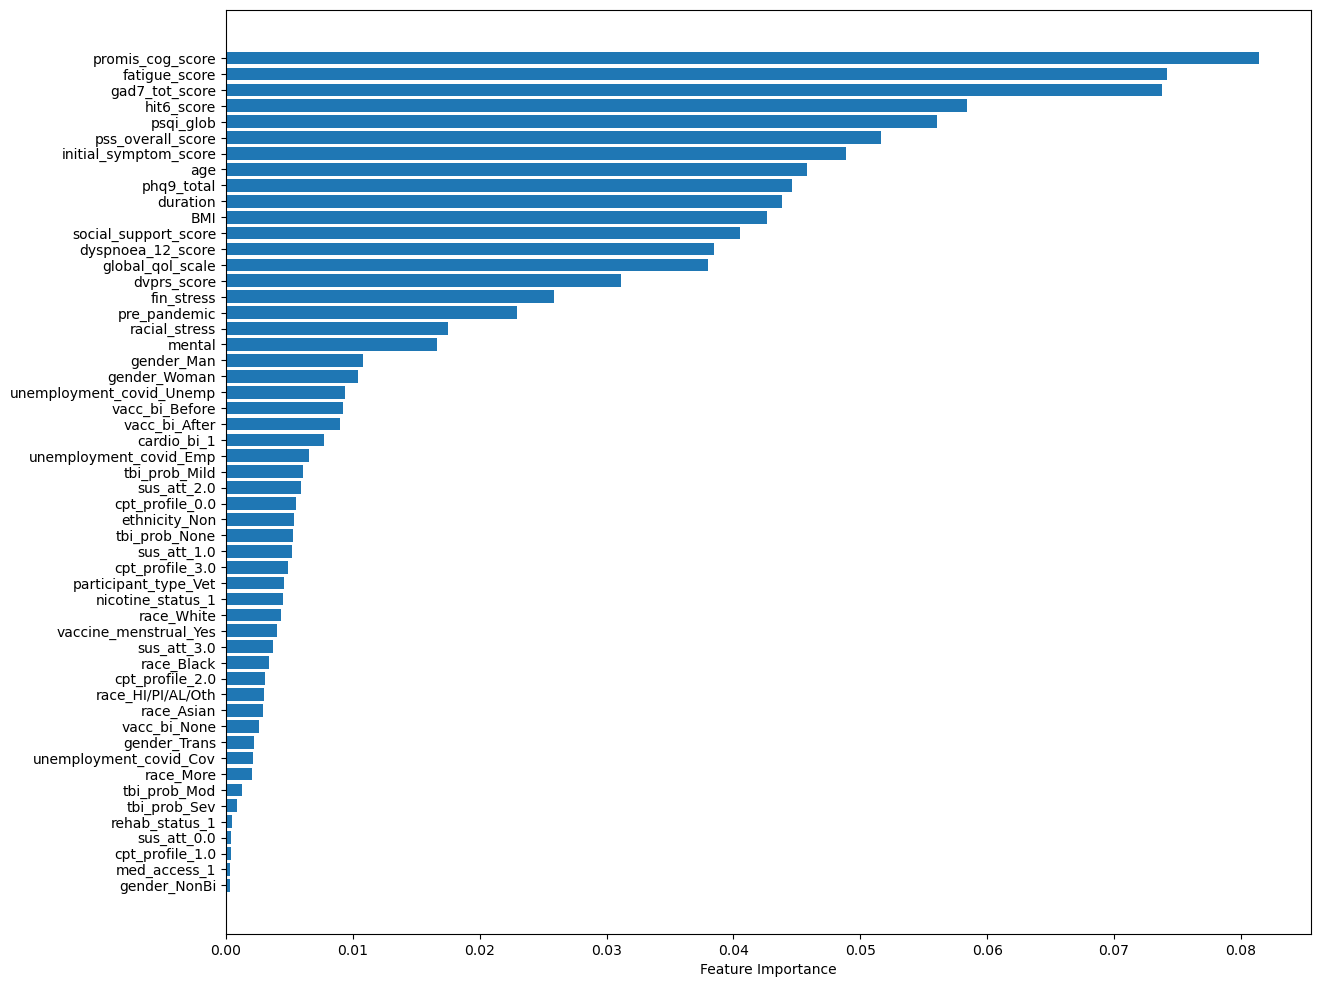

In [439]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(14, 12))
#plt.barh(range(len(feature_names)), importances, align='center')
#plt.yticks(range(len(feature_names)), feature_names)

plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
#plt.show()
plt.savefig('featimp.png')

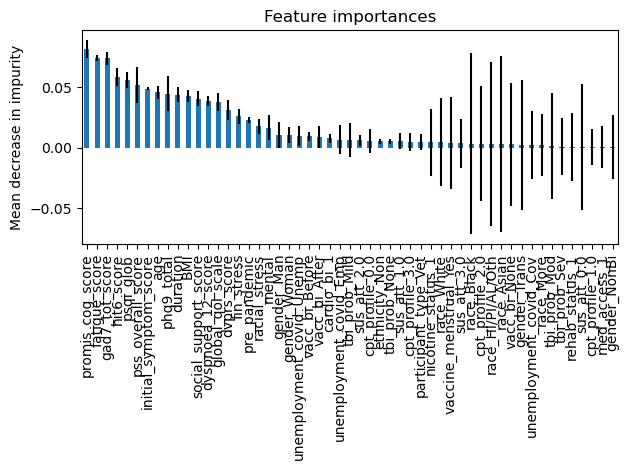

In [440]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



## KNN Classifier

In [441]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 11):
    # Create a K-Nearest Neighbors model with k neighbors and fit it to the balanced training data
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_under, y_train_under.values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'Sens': sensitivity_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)),
        'Acc': accuracy_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)) 
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [442]:
knn_results

,k,Sens,Acc
0,1,0.662921,0.613445
1,2,0.393258,0.663866
2,3,0.685393,0.684874
3,4,0.539326,0.697479
4,5,0.707865,0.705882
5,6,0.595506,0.710084
6,7,0.719101,0.714286
7,8,0.662921,0.718487
8,9,0.764045,0.722689
9,10,0.696629,0.710084


In [443]:
# Create a K-Nearest Neighbors (KNN) classifier with 6 neighbors and fit it to the balanced training data
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train_under, y_train_under.values.ravel())

## Boosted Tree

In [444]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [20,21,22,23,24],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 23}

## Single Decision Tree

In [445]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5]
    
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree1_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree1_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree1_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [475]:
tree1 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5, random_state = 1).fit(X_train_under, y_train_under)

In [476]:
tree1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12209619,
       0.03773662, 0.        , 0.        , 0.03975027, 0.07141623,
       0.44730083, 0.09447434, 0.01171856, 0.        , 0.        ,
       0.        , 0.104375  , 0.        , 0.07113195, 0.        ,
       0.        , 0.        , 0.        ])

In [477]:
# Get feature importance scores
importances=tree1.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.4473
age: 0.1221
dyspnoea_12_score: 0.1044
gad7_tot_score: 0.0945
hit6_score: 0.0714
duration: 0.0711
promis_cog_score: 0.0398
global_qol_scale: 0.0377
phq9_total: 0.0117
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
ethnicity_Non: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
tbi_prob_Mild: 0.0000
tbi_prob_Mod: 0.0000
tbi_prob_None: 0.0000
tbi_prob_Sev: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_None: 0.0000
cardio_bi_1: 0.0000
med_access_1: 0.0000
sus_att_0.0: 0.0000
sus_att_1.0: 0.0000
sus_att_2.0: 0.0000
sus_att_3.0: 0.0000
initial_s

# Model Performance on Test Set: Confusion Matrix, Accuracy Metrics, ROC Curve Comparison

## Logistic Regression with L2 Penality with 0.5 Cutoff

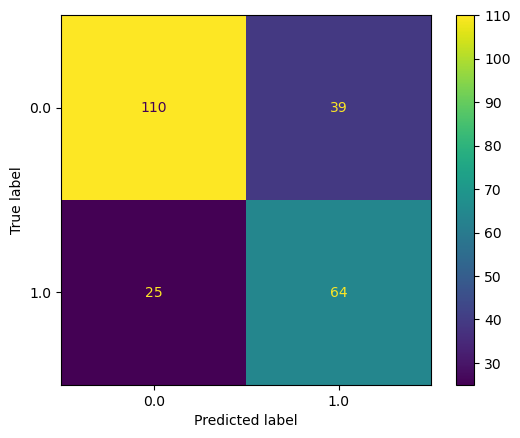

In [482]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [508]:
#Sensitivity, specificity, and accuracy for log reg
logl2_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_f1 = f1_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_sens_bal, logl2_spec_bal, logl2_acc_bal, logl2_f1

(0.7191011235955056, 0.738255033557047, 0.7310924369747899, 0.6666666666666666)

## Logistic Regression L2 with Alternate Threshold - Lowering Below 50 Slightly Improves Performance

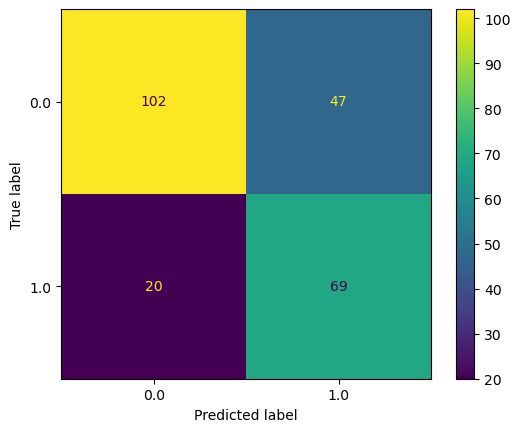

In [484]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = (log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45).astype(int),
                              labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [509]:
#Sensitivity, specificity, and accuracy for log reg
logl2T_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[: , 1] >= 0.45)
logl2T_f1 = f1_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_sens_bal, logl2T_spec_bal, logl2T_acc_bal, logl2T_f1

(0.7752808988764045, 0.6845637583892618, 0.7184873949579832, 0.673170731707317)

## Logistic Regression with L1 With 0.5 Threshold

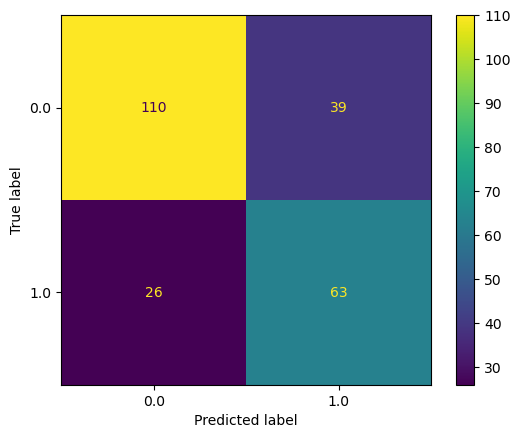

In [486]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l1_bal.predict(X_test_log),
                              labels = log_l1_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [510]:
#Sensitivity, specificity, and accuracy for log reg
logl1_sens_bal = sensitivity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_spec_bal = specificity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_acc_bal = accuracy_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_f1 = f1_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_sens_bal, logl1_spec_bal, logl1_acc_bal, logl1_f1

(0.7078651685393258, 0.738255033557047, 0.726890756302521, 0.6596858638743456)

# K-Nearest Neighbors Model Evaluation

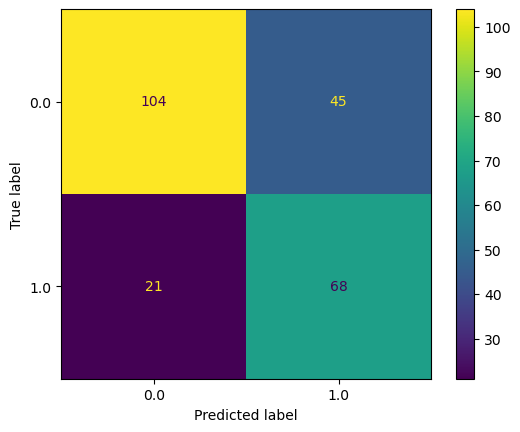

In [488]:
#KNN
# Compute the confusion matrix for KNN 
knn_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = knn.predict(X_test_pipe), labels = knn.classes_)
# Create a ConfusionMatrixDisplay object for visualization
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()


In [511]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
knn_sens_bal = sensitivity_score(y_test_imp, knn.predict(X_test_pipe))
knn_spec_bal = specificity_score(y_test_imp, knn.predict(X_test_pipe))
knn_acc_bal = accuracy_score(y_test_imp, knn.predict(X_test_pipe))
knn_f1 = f1_score(y_test_imp, knn.predict(X_test_pipe))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal, knn_f1

(0.7640449438202247, 0.697986577181208, 0.7226890756302521, 0.6732673267326732)

## Boosted Decision Tree

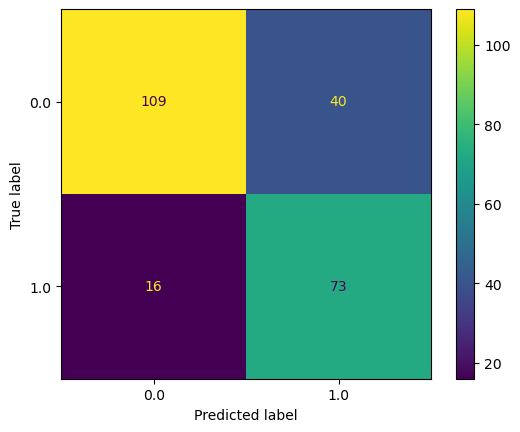

In [490]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree_search.predict(X_test_pipe), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [512]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_spec_bal = specificity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_acc_bal = accuracy_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_f1 = f1_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_sens_bal, tree_spec_bal, tree_acc_bal, tree_f1

(0.8202247191011236,
 0.7315436241610739,
 0.7647058823529411,
 0.7227722772277227)

## Single Decision Tree

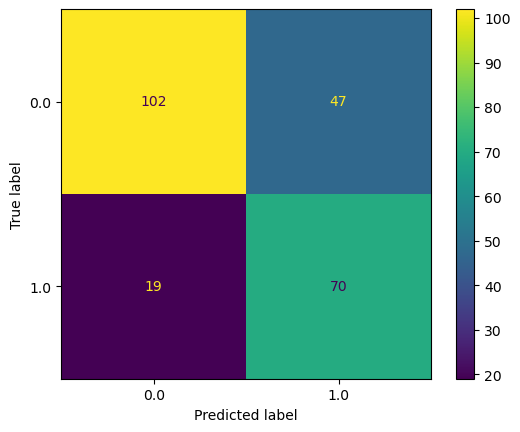

In [492]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree1.predict(X_test_pipe), labels = tree1.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree1.classes_)
tree_disp_bal.plot()
plt.show() 

In [513]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree1_sens_bal = sensitivity_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_spec_bal = specificity_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_acc_bal = accuracy_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_f1 = f1_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_sens_bal, tree1_spec_bal, tree1_acc_bal, tree1_f1

(0.7865168539325843,
 0.6845637583892618,
 0.7226890756302521,
 0.6796116504854369)

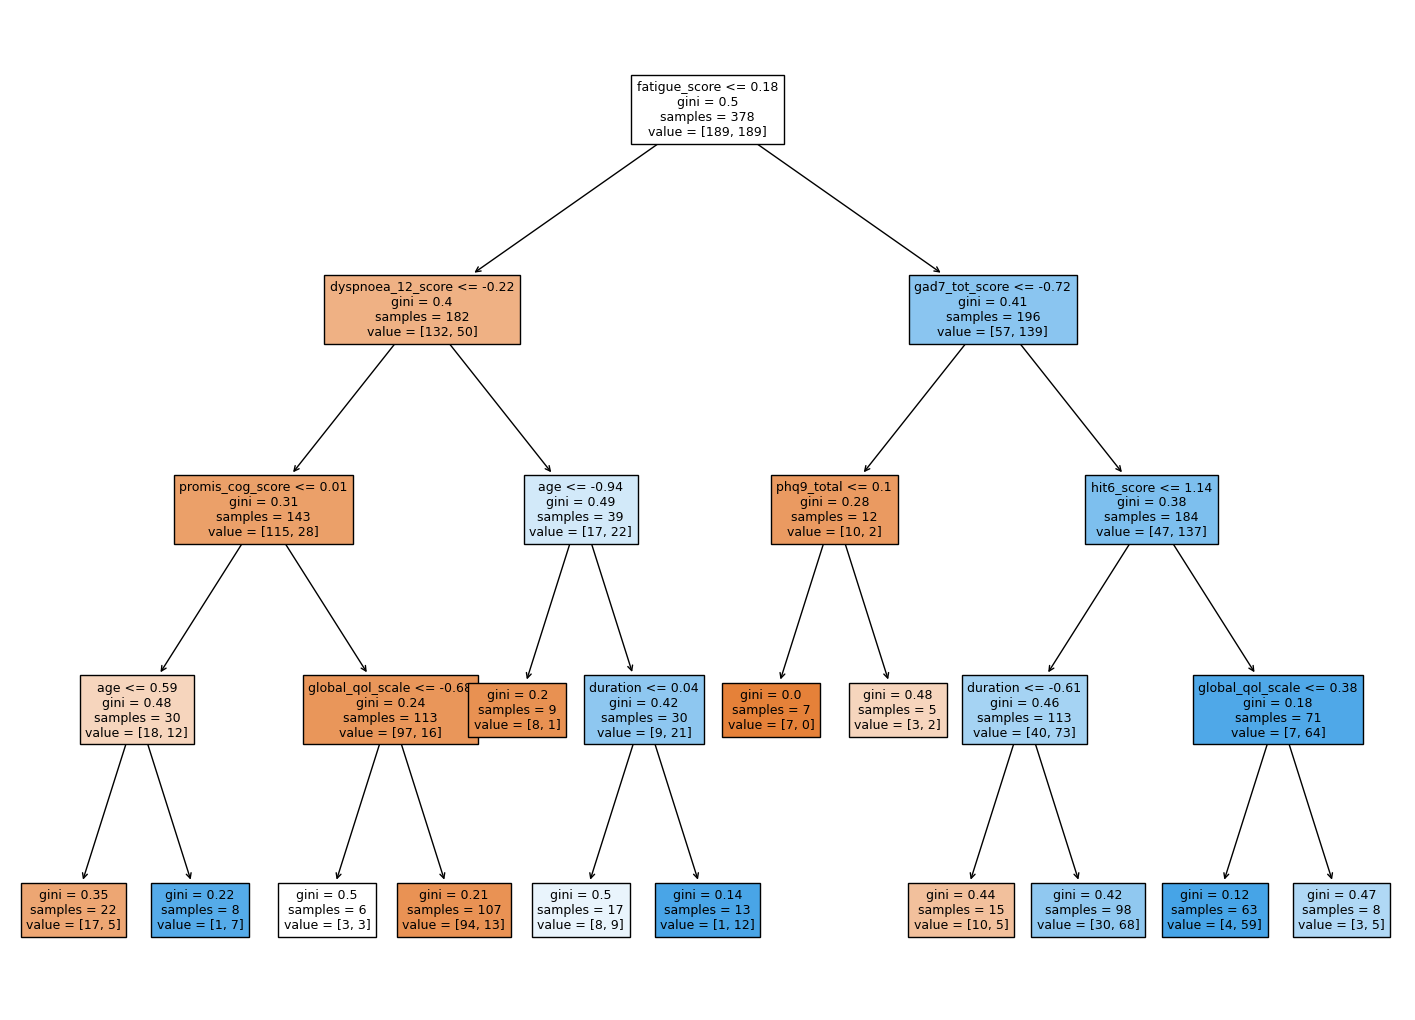

In [494]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree1, feature_names = X_train_under.columns, filled = True, precision = 2, fontsize = 9)
plt.show()

## Random Forest Performance

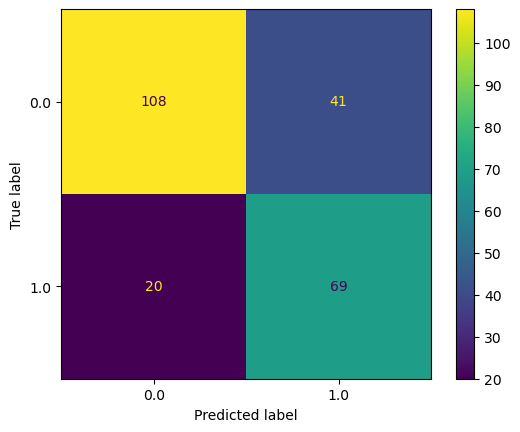

In [495]:
#RF
# Compute the confusion matrix for RF 
rf_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = random_forest.predict(X_test_pipe), labels = random_forest.classes_)
# Create a ConfusionMatrixDisplay object for visualization
rf_disp_bal = ConfusionMatrixDisplay(confusion_matrix= rf_cm_bal, display_labels=random_forest.classes_)
rf_disp_bal.plot()
warnings.filterwarnings('ignore')
#plt.show()
plt.savefig('rf_cm.png')

In [514]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced datar
rf_sens_bal = sensitivity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_spec_bal = specificity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_acc_bal = accuracy_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_f1 = f1_score(y_test_imp, random_forest.predict(X_test_pipe))
warnings.filterwarnings('ignore')
rf_sens_bal, rf_spec_bal, rf_acc_bal, rf_f1

(0.7752808988764045,
 0.7248322147651006,
 0.7436974789915967,
 0.6934673366834171)

# Classification Test Set Performance Metrics Table

In [515]:
# Create a table to display performance metrics for different models on the validation dataset

val_performance = [
{'Model': 'Logistic Regression L2', 'Validation Sensitivity': logl2_sens_bal, 'Validation Specificity':logl2_spec_bal, 
 'Accuracy': logl2_acc_bal, 'F1 Score': logl2_f1},
    {'Model': 'Logistic Regression L2 0.45', 'Validation Sensitivity': logl2T_sens_bal, 'Validation Specificity':logl2T_spec_bal, 
 'Accuracy': logl2T_acc_bal, 'F1 Score': logl2T_f1},
    {'Model': 'Logistic Regression L1', 'Validation Sensitivity': logl1_sens_bal, 'Validation Specificity':logl1_spec_bal, 
 'Accuracy': logl1_acc_bal, 'F1 Score': logl1_f1},
    {'Model': 'Boosted Tree', 'Validation Sensitivity': tree_sens_bal, 'Validation Specificity':tree_spec_bal, 
 'Accuracy': tree_acc_bal, 'F1 Score': tree_f1},
    {'Model': 'Single Tree', 'Validation Sensitivity': tree1_sens_bal, 'Validation Specificity':tree1_spec_bal, 
 'Accuracy': tree1_acc_bal, 'F1 Score': tree1_f1},
    {'Model': 'Random Forest', 'Validation Sensitivity': rf_sens_bal, 'Validation Specificity':rf_spec_bal, 
 'Accuracy': rf_acc_bal, 'F1 Score': rf_f1},
    {'Model': 'K-Nearest Neighbors', 'Validation Sensitivity': knn_sens_bal, 'Validation Specificity':knn_spec_bal, 
 'Accuracy': knn_acc_bal, 'F1 Score': knn_f1},
    
]
# Create a formatted table using tabulate and specify the format as 'fancy_grid'
table = tabulate(val_performance, headers='keys', tablefmt='fancy_grid')
# Display the comparison table
print(table)

╒═════════════════════════════╤══════════════════════════╤══════════════════════════╤════════════╤════════════╕
│ Model                       │   Validation Sensitivity │   Validation Specificity │   Accuracy │   F1 Score │
╞═════════════════════════════╪══════════════════════════╪══════════════════════════╪════════════╪════════════╡
│ Logistic Regression L2      │                 0.719101 │                 0.738255 │   0.731092 │   0.666667 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────┤
│ Logistic Regression L2 0.45 │                 0.775281 │                 0.684564 │   0.718487 │   0.673171 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────┤
│ Logistic Regression L1      │                 0.707865 │                 0.738255 │   0.726891 │   0.659686 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼──────

## ROC Curve Comparison

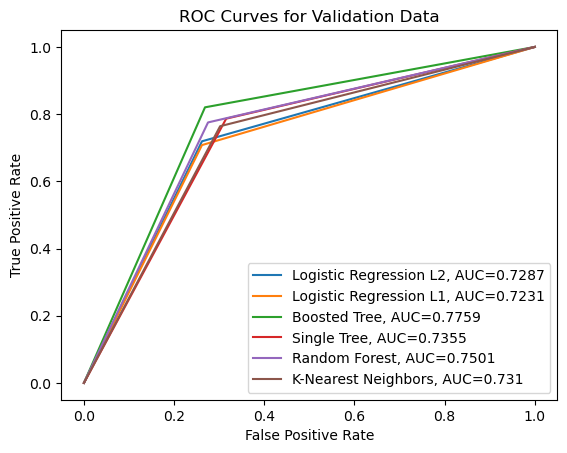

In [520]:
#ROC curve for logistic regression L2
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l2_bal.predict(X_test_log))
auc_log2 = round(roc_auc_score(y_test_imp, log_l2_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L2, AUC="+str(auc_log2))

#ROC Curve for logistic regression L1
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l1_bal.predict(X_test_log))
auc_log1 = round(roc_auc_score(y_test_imp, log_l1_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L1, AUC="+str(auc_log1))

#ROC for Boosted Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree_search.predict(X_test_pipe))
auc_tree = round(roc_auc_score(y_test_imp, tree_search.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc_tree))

#ROC for Single Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree1.predict(X_test_pipe))
auc_tree1 = round(roc_auc_score(y_test_imp, tree1.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Single Tree, AUC="+str(auc_tree1))

#ROC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test_imp, random_forest.predict(X_test_pipe))
auc_rf = round(roc_auc_score(y_test_imp, random_forest.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rf))

#ROC for KNN
fpr, tpr, thresholds = roc_curve(y_test_imp, knn.predict(X_test_pipe))
auc_knn = round(roc_auc_score(y_test_imp, knn.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc_knn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves for Validation Data')
plt.legend()
plt.savefig('ROCs.png')

# Lift Curve for Top Models

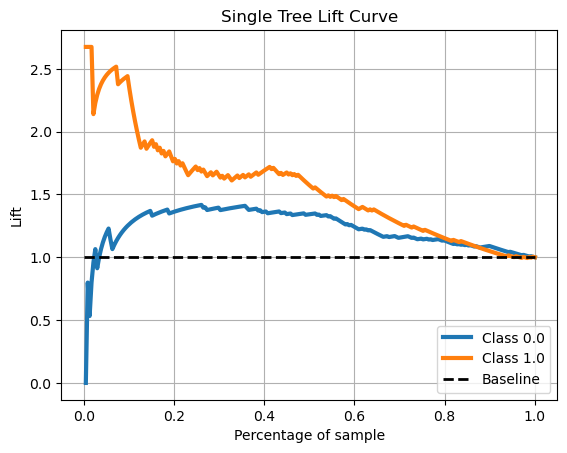

In [521]:
#Lift curve for logistic regression on test data
plot_lift_curve(y_test_imp, tree1.predict_proba(X_test_pipe), title = 'Single Tree Lift Curve')
plt.savefig('LogLift.png')

# Explanatory Model Training: Veteran Civilian Matched Sample

## Using full matched sample for training, and maximizing training accuracy with 5-fold CV. 

In [504]:
# Create Logistic Regression model with L2 regularization
log_l2 = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2.fit(X_log, y_imp.values.ravel())

LogisticRegressionCV(cv=5, random_state=1)